In [ ]:
# Подключаем гугл диск

data_path = '/content/drive/MyDrive/ai/sounds/Голос_близко/'

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Текущий ход мыслей относительно решения задачи

- Исследование данных показало, что каждый аудиофайл содержит отдельную команду для робота в трех вариациях.

- Предобработка данных может состоять из следующих этапов:
 1. Разделение каждого файла на три файла, в каждом из которых будет содержаться отдельная вариация команды
 2. Удаление шумов из файлов, в которых шумы присутствуют

- Следующим этапом может быть преобразование речи в текст и расчет метрик качества распознавания.

- Для того чтобы исходных данных получилось больше, можно выполнить аугментацию

- Если величины метрик окажутся удовлетворительными, то, вероятно, даже не придется обучать сетку. Т.к. готовые библиотеки распознавания речи уже достаточно хороши.

- Ставим в соответвие тексту, при определенной величине метрики WER, например,определенный код команды и передаем этот код в функцию для передачи по wi-fi

# Проба библиотек для работы с аудио

In [ ]:
# pydub - библиотека для работы с аудио

!pip install pydub

In [ ]:
from pydub import AudioSegment

voice_command = AudioSegment.from_file('/content/drive/MyDrive/ai/sounds/Голос_близко/Остановись.WAV')

In [ ]:
voice_command

In [ ]:
# тип данных
print(type(voice_command))

# продолжительность аудио (секунды)
print(f"Продолжительность: {voice_command.duration_seconds} секунд")

# частота дискретизаци
print(f"Частота дискретизации: {voice_command.frame_rate}")

# количество каналов
print(f"Количество каналов: {voice_command.channels}")

<class 'pydub.audio_segment.AudioSegment'>
Продолжительность: 6.36 секунд
Частота дискретизации: 48000
Количество каналов: 2


In [ ]:
# Каналы

channels = voice_command.split_to_mono()

channels[0]

In [ ]:
channels[1]

In [ ]:
# librosa

import librosa
import IPython
import matplotlib.pyplot as plt
import librosa.display as ld

signal, sr = librosa.load('/content/drive/MyDrive/ai/sounds/Голос_близко/Остановись.WAV')

In [ ]:
print(signal.shape, sr)

(140238,) 22050


In [ ]:
print(signal)

[ 3.2375038e-07  2.8746501e-06  6.2988706e-06 ... -5.4183110e-06
 -4.7756785e-06 -4.6691043e-06]


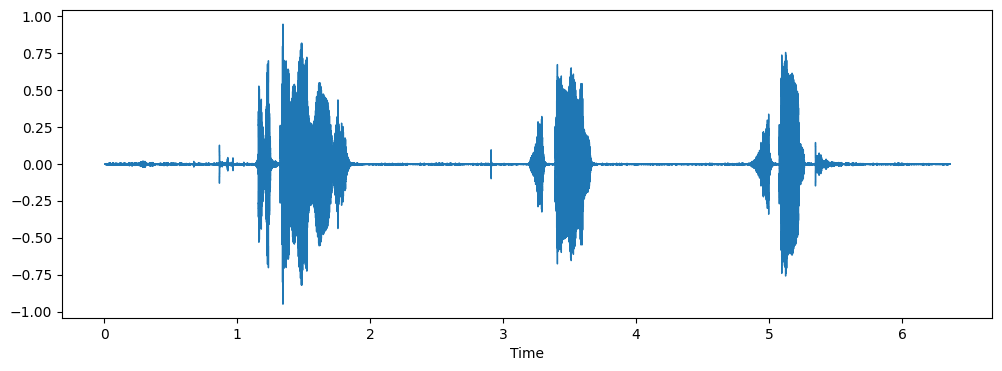

In [ ]:
plt.figure(figsize=(12,4))
ld.waveshow(signal, sr=sr)

In [ ]:
display(IPython.display.Audio(signal, rate = sr))

Text(0, 0.5, 'Amplitude')

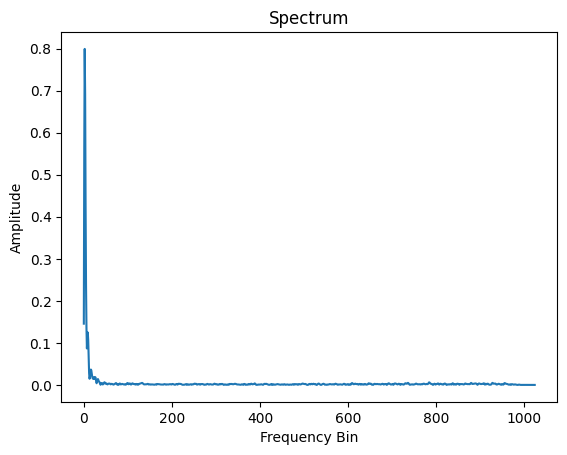

In [ ]:
import numpy as np

n_fft = 2048
ft = np.abs(librosa.stft(signal[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

# Что можно исследовать ?

- Количество файлов
- Длительность файлов (мин, мак, сред)
- Частота дискретизации
- Количество каналов
- Спектр
- Распознаваемость

In [ ]:
import os

data_path = '/content/drive/MyDrive/ai/sounds/Голос_близко/'
file_names =[f"{data_path}{f}" for f in os.listdir(data_path)]

data = []
for f in file_names:
    try:
        data.append(AudioSegment.from_file(f))
    except:
        print(f"Не удалось открыть: '{f}'")


print(data)

data[0]



[<pydub.audio_segment.AudioSegment object at 0x7e4a5eff14e0>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff0940>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff1f60>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff11e0>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff0a00>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff2050>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff0a30>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff1f30>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff2650>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff1d80>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff1ed0>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff0b20>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff2ec0>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff3250>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff1ba0>, <pydub.audio_segment.AudioSegment object at 0x7e4a5eff1390>, <pydub.audio_segment.Au

In [ ]:
# продолжительность аудио (секунды)
print(f"Продолжительность: {data[0].duration_seconds} секунд")

# частота дискретизаци
print(f"Частота дискретизации: {data[0].frame_rate}")

# количество каналов
print(f"Количество каналов: {data[0].channels}")

Продолжительность: 9.478666666666667 секунд
Частота дискретизации: 48000
Количество каналов: 2


In [ ]:
import pandas as pd

df = pd.DataFrame({'duration': [],
                   'frame_rate': [],
                   'channels': []})

In [ ]:
for cmd in data:
    df.loc[len(df.index )] = [cmd.duration_seconds, cmd.frame_rate, cmd.channels]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   duration    42 non-null     float64
 1   frame_rate  42 non-null     float64
 2   channels    42 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [ ]:
df['duration'].describe()

count    42.000000
mean      5.445492
std       2.256556
min       2.680000
25%       3.706000
50%       5.158000
75%       6.792000
max      14.613333
Name: duration, dtype: float64

Получили сводку по продолжительности аудифайлов

# Распознавание речи

In [ ]:
!pip -q install ffmpeg-python SpeechRecognition pydub jiwer

import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/v2.0/micro.py', None, quiet=True)

import micro
import scipy
import os
import speech_recognition as sR
from jiwer import wer
from pydub import AudioSegment

def record():
    # Запустим процесс записи с микрофона
    audio, sr = micro.get_audio()

    # Сохраним запись в файл recording.wav
    scipy.io.wavfile.write('recording.wav', sr, audio)


def recognizeAudio(filename, duration=None):
  AUDIO_FILE = os.path.join(filename) # задаем путь к аудиофайлу
  r = sR.Recognizer() # создаем объект класса Recognizer
  with sR.AudioFile(AUDIO_FILE) as source:
    audio = r.record(source, duration=duration) # считываем аудиофайл

  return r.recognize_google(audio, language='ru') # запускаем распознавание

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.8 MB/s eta 0:00:00


In [ ]:
# Пробуем распознать аудио

original = "выключай автоматический режим движения выключи режим авто выключи режим автохода"

command = recognizeAudio(file_names[0])

command

'выключай автоматический режим движения Выключи режим Auto Выключи режим AutoCAD'

In [ ]:
print('WER:', wer(original.lower(), command.lower())) # считаем метрику качества

WER: 0.2


# Эксперименты с chatGPT


Вопрос:
- 'Есть набор файлов. В каждом содержится аудиозапись голосовой команды. Стоит задача написать программу для распознавания голосовых команд, как из этих файлов, так и из новых. Что ты сделаешь в качестве предобработки данных?

Ответ:
- Для предобработки данных я могу провести следующие шаги:

1. Загрузить аудиозаписи из файлов, используя соответствующую библиотеку. Например, я могу использовать библиотеку librosa для работы с аудиоданными.

2. Преобразовать аудиозаписи в числовое представление. Например, я могу использовать преобразование звука в спектрограмму, процесс, который преобразует аудиосигнал в двумерное представление, показывающее частоты и временную структуру звука.

3. Нормализовать данные, чтобы привести их к общему диапазону значений. Например, я могу применить нормализацию нулевым средним и единичной дисперсией к спектрограммам.

4. Разбить данные на обучающий и тестовый наборы для оценки производительности модели. Например, я могу использовать 80% данных для обучения модели и оставшиеся 20% для тестирования.

5. Можно также применить дополнительные техники предобработки данных, такие как аугментация, чтобы увеличить размер обучающего набора, или фильтрация шума, чтобы улучшить качество данных.

В результате этих шагов мы получим предварительно обработанные данные, которые можно использовать для обучения модели распознавания голосовых команд.

# Предобработка

## Попробовать разделить файлы из нескольких команд на части. Использовать более длинные паузы между командами внутри файла (так как времени было мало считерил и сделал запрос к чатГПТ:

'В аудиофайле записаны три фразы, разделенные паузами. Напиши код на python, которой разделит этот файл на три аудиофайла, в каждом из которых будут эти фразы по отдельности'
Ниже код от ГПТ

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Загрузка аудиофайла
# audio = AudioSegment.from_file("audio_file.wav", format="wav")
audio = data[0]

# Разделение на фразы
phrases = split_on_silence(audio, min_silence_len=500, silence_thresh=-50)

# Сохранение каждой фразы в отдельный файл
for i, phrase in enumerate(phrases):
    phrase.export(f"phrase_{i+1}.wav", format="wav")

In [ ]:
audio_1 = AudioSegment.from_file("phrase_1.wav", format="wav")

audio_1

In [ ]:
audio_2 = AudioSegment.from_file("phrase_2.wav", format="wav")

audio_2

In [ ]:
audio_3 = AudioSegment.from_file("phrase_3.wav", format="wav")

audio_3